In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/sd/Works/Study/Study-ML/.venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/sd/Works/Study/Study-ML/.venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 지도 학습

## 분류와 회귀

* 분류는 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것으로, 딱 두 개의 클래스로 분류하는 이진 분류와 셋 이상의 클래스로 분류하는 다중 분류로 나뉜다.
* 회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수를 예측하는 것이다. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 대표적인 예이다.

## 일반화, 과대접합, 과소적합

* 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화(generalization) 되었다고 한다.
* 가진 정보를 모두 사용해서 너무 복잡한 데이터를 만드는 것을 과대적합(overfitting)이라고 하며, 과대적합은 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다.
* 너무 간단한 모델이 선택되는 것을 과소적합(underfitting)이라고 한다.
* 데이터의 종류나 양을 적절히 조절하면 과대/과소를 해결하는데 많은 도움이 된다.

## 분류에 사용될 데이터

### 간단한 샘플 예제

Text(0, 0.5, 'second')

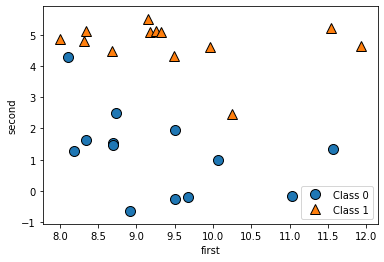

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("first")
plt.ylabel("second")

### 유방암 예제

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("유방함 데이터의 형태", cancer.data.shape) # 569개의 데이터, 30개의 특성

유방함 데이터의 형태 (569, 30)


In [5]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [6]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 회귀에 사용될 데이터

### 간단한 샘플 예제

Text(0, 0.5, 'Target')

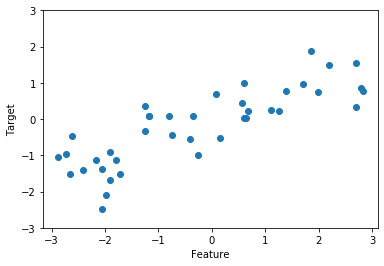

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### 보스턴 주택 가격

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 형태:", boston.data.shape)

데이터 형태: (506, 13)


# k-NN

$k$-NN($k$-Nearest Neighbors) 알고리즘은 훈련 데이터를 그냥 저장하는 것이 `모델`을 만드는 과정의 전부이며, 새로운 데이터에 대해 예측은 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '가장 가까운 이웃'을 찾으면 된다.

## 간단한 예제로 알아보는 k-NN

### $k=1$ 일 때

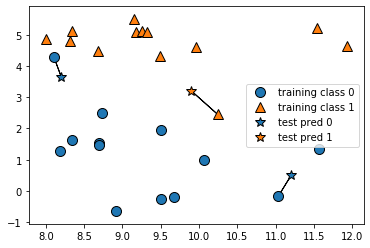

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

### $k >= 2$ 일 때

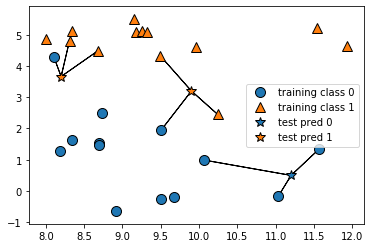

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## scikit-learn을 사용한 예제

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

`KNeighborsClassifier()`의 매개변수

* algorithm : 가장 가까운 이웃을 계산하는데 사용하는 알고리즘으로 `auto`는 fit 메소드에서 전달된 값을 기반으로 가장 적합한 알고리즘을 결정하려고 시도하는 것 입니다. 그 외 ball_tree, kd_tree, brute 등을 사용할 수 있다.
* leaf_size : ball_tree, kd_tree에 전달되는 leaf의 크기로, default 값은 30으로 설정되어 있다. tree에서 얼만큼의 비율로 나눌지를 결정하는 것으로 leaf_size가 너무 작으면 노이즈에 약하고, leaf_size가 너무 크면 분류를 너무 광범위하게 설정해서 예측 성능이 낮아진다.
* metric: 거리 측정 방식을 변경하는 매개변수로 default 값은 minkowsi 입니다.
* metric_params: 메트릭 함수의 추가 키워드로 기본값은 None 이다
* n_jobs: 이웃을 검색하기 위해 실행하는 병렬 작업 수
* n_neighbors: 검색할 이웃의 수로 default 값은 5입니다.
* p: minkowski 의 매개변수입니다.
* Weights 는 예측에 사용하는 가중치로 `uniform`은 동일한 가중치를, `distance`는 가까운 이웃에 더 큰 가중치를 준다.

In [13]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [14]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석

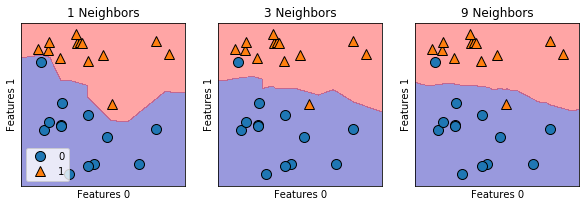

In [15]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} Neighbors".format(n_neighbors))
    ax.set_xlabel("Features 0")
    ax.set_ylabel("Features 1")
    
axes[0].legend(loc=3)

$k$가 클수록 더 부드러운 경계를 그리고 있고, 부드러운 경계는 더 단순한 모델을 의미한다. 그리고 2D 데이터의 경우 결정경계를 그려보는 방법은 매우 좋은 방법이다.

### 유방암 데이터

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [17]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

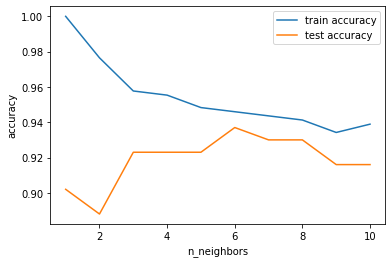

In [18]:
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

* $k$==1 일 때, 훈련 정확도는 완벽하지만 $k$가 커질수록 모델은 단순해지고 훈련 정확도가 줄어듬
* $k$==1 일 때, 검증 정확도가 낮고 $k$==10 일 때 정확도가 낮아지는 것을 확인할 수 있음
* 정확도가 가장 좋을 때는 중간 정도인 여섯개를 사용했을 경우

----------

## k-최근접 이웃 회귀

$k$-최근접 이웃 알고리즘은 회귀 분석에도 쓰인다.

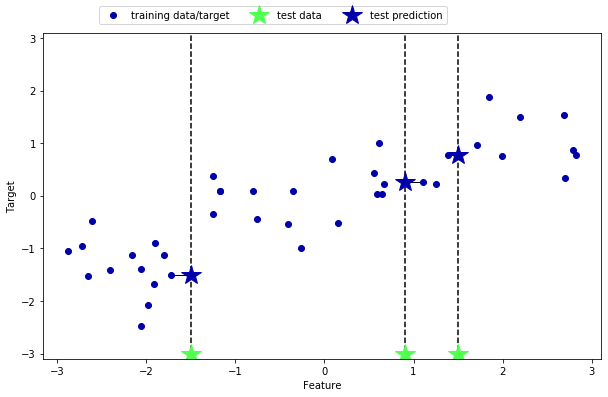

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

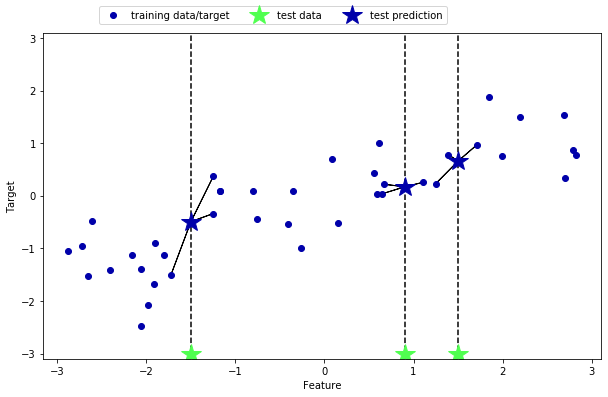

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(f"테스트 세트 예측: {reg.predict(X_test)}")
print(f"테스트 세트 R^2: {reg.score(X_test, y_test)}")

테스트 세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.8344172446249604


score 메서드를 사용해서 모델을 평가할 수 있는데, $R^2$ 값을 반환한다. 결정 계수라고도 하는 $R^2$ 값은 회귀 모델에서 예측의 접학도를 측정한 것으로 보통 0과 1사이의 값이 된다. 
* 1은 완벽한 예측
* 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델
* $R^2$은 음수가 될 수 도 있으며, 예측과 타킷이 상반된 경향을 가지는 경우도 있음

### KNeighborsRegressor  분석

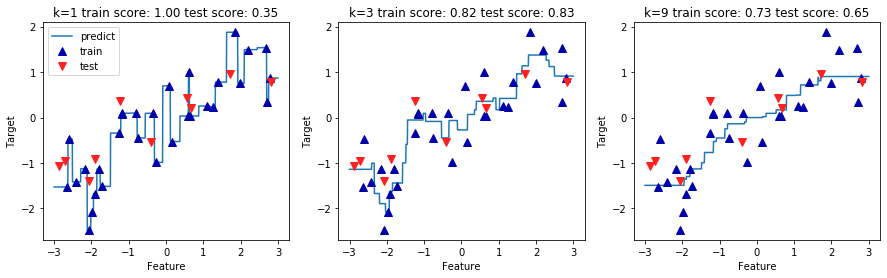

In [22]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("k={} train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["predict", "train", "test"], loc="best")

일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 개
* 데이터 포인트 사이의 거리를 재는 방법
* 이웃의 수

실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야 함, 기본적으로 여러 환경에서 잘 동작하는 유클리디아 거리 방식을 사용

k-NN의 장점은 이해하기 매우 쉬운 모델이라는 점입니다. 그리고 많이 조정하지 안항도 자주 좋은 성능을 발휘합니다. 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점

k-NN은 1) 훈련 세트가 매우 크면 예측이 느려짐 ==> 전처리 과정이 매우 중요, 2) 많은 특성을 가진 데이터셋에서 잘 동작하지 않음, 3) 특성 값 대부분이 0인 회소한 데이터셋과는 특히 잘 작동하지 않음


## k-nn 이웃 알고리즘은 이해하기 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서 잘 쓰지 않음


# 선형 모델(linear model)

선형 모델은 100여 년 전에 개발되었고, 지난 몇십 년 동안 폭넓게 연구되고 현재도 사용되고 있다. 선형 모델의 가장 큰 특징은 선형 함수를 만들어 예측을 수행한다.


$ \widehat{y} = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b $

$w[0]$는 기울이고, $b$는 $y$축과 만나는 절편이다. 선형의 특성 때문에 특성이 더 많은 경우에 $ \widehat{y} $도 완벽하게 선형 함수로 모델링할 수 있다(방정식보다 미지수가 많은 경우 불충분한 시스템이라 함).

회귀를 위한 선형 모델은 다양한데, 이 모델들은 훈련 데이터로부터 모델 파라미터 $w$와 $b$를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 난다.



w[0]: 0.393906  b: -0.031804


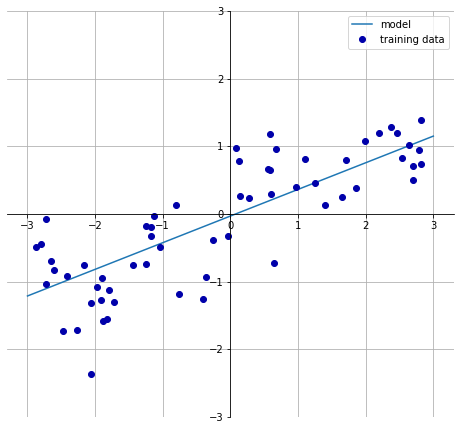

In [23]:
mglearn.plots.plot_linear_regression_wave()

## 선형 회귀(최소제고법)

선형 회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘이다. 선형 회귀는 예측($\widehat{y}$)과 훈련 세트에 있는 $y$ 사이의 평균제곱오차를 최소화하는 파리미터 $w$와 $b$를 찾는 것이다.

In [24]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# 가중치(or 계수)
print("lr.coef_:", lr.coef_)

# 절편(or 편향))
print("lr.intercept_:", lr.intercept_)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [25]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 0.95 vs 0.61 ==> 과대적합

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 리지(Ridge) 회귀

리지(Ridge)도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용한다. 하지만 리지 회귀에서의 가중치($w$) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다. 가중치의 절댓값을 가능한 한 작게 만드는 것이다. 다시 말해서 $w$의 모든 원소가 $0$에 가깝게 되길 원합니다.

직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것으로 이런 제약을 규제라고 한다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다. 리지 회귀에 사용하는 규제 방식을 L2 규제라고 한다.

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


Ridge는 모델을 단순하게 (계수를 $0$에 가깝게) 해주고 훈련 세트에 대한 성능 사이의 절출할 수 있는 방법을 제공한다. 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다.

In [27]:
from sklearn.linear_model import Ridge

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [28]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


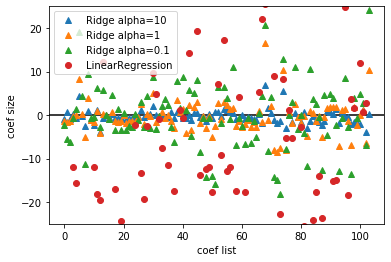

In [29]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, '^', label='Ridge alpha=1')
plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("coef list")
plt.ylabel("coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

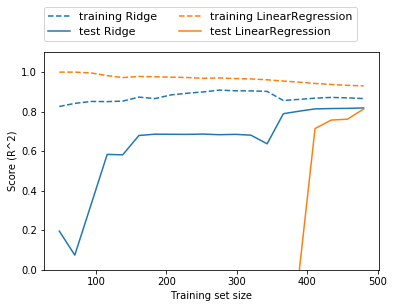

In [30]:
mglearn.plots.plot_ridge_n_samples()

위 그래프에서 알 수 있듯이 적당한 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀를 선형 회귀의 성능이 같아질 것이라는 점이다. 또 하나는 선형 회귀의 훈련 데이터 성능이 감소한다는 것으로, 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워진다.

### 라소

리지 회구에서와 같이 라소도 계수를 0에 가깝게 만들려고 한다. 하지만 방식이 조금 다르면 L1 규제라고한다. L1 규제의 결과로 라소를 사용할 떄 어떤 계수는 정말 $0$이 된다. 즉, 완전히 제외되는 특성이 생긴다는 뜻이다. 어떻게 보면 특성 선택이 자동으로 이뤄진다고 볼 수 있다.

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수:  4


In [32]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수:  33


In [33]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수:  96


보통은 리지 회귀를 선호하지만 특성이 많고 그중 일부분만 중요하다면 라소가 더 좋은 선택일 수 있다. 또한 분석하기 쉬운 모델을 원하다면 라소가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어준다. scikit-learn은 Lasso와 Ridge의 페널티를 결합한 ElasticNet도 제공합니다. 이 조합은 최상의 성능을 제공하지만 L1과 L2 규제를 위한 매개변수 두 개를 조정해야 한다.

## 분류

분류용 선형 모델에서는 결정 경계가 입력의 선형 함수다. 다른 말로 하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기다.

선형 모델을 학습시키는 알고리즘은 크게 두 가지 방법으로 구분할 수 있다. 1) 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법, 2) 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지 알 수 있다.

가장 널리 알려진 두 개의 선형 분류 알고리즘은 `LogisticRegression`, `LinearSVC`다.

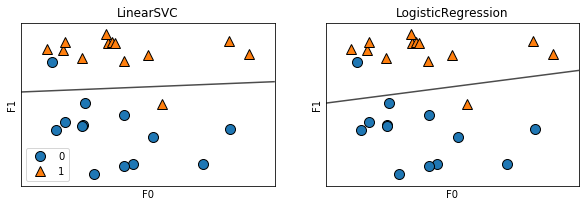

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("F0")
    ax.set_ylabel("F1")
    
axes[0].legend()

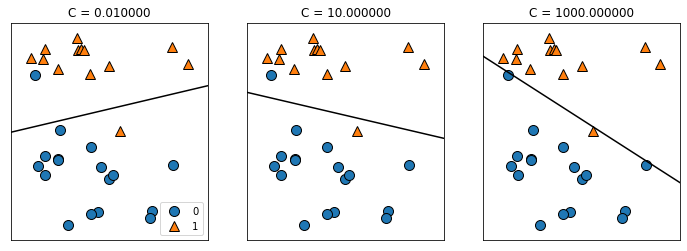

In [35]:
mglearn.plots.plot_linear_svc_regularization()

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [37]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.967
테스트 세트 점수: 0.965


In [38]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


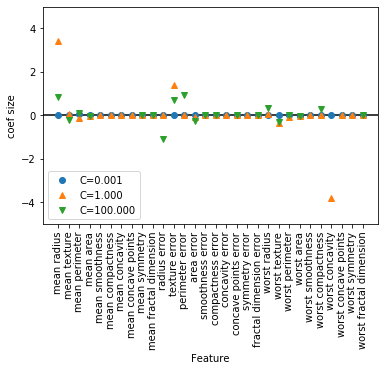

In [39]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3)

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


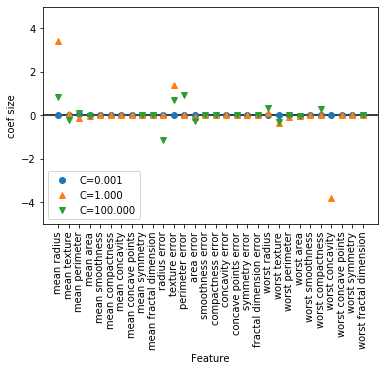

In [40]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류를 위한 선형 모델

많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다. 대부분이 다중 클래스를 지원하지 않는다. 그래서 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법이다. 

일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다. 결국 클래스 수만큼 이진 분류 모델이 만들어진다. 클래스별 이진 분류기를 만들면 각 클래스가 계수 백터와 절편을 하나씩 갖게 된다. 결국 신뢰도를 나타내는 공식의 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당된다.


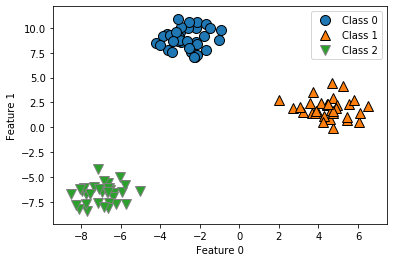

In [41]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

세 개의 클래스를 가진 2차원 데이터셋을 `LinearSVC` 분류기를 훈련해보자

In [42]:
linear_svm = LinearSVC().fit(X, y)
print("coef size: ", linear_svm.coef_.shape)
print("intercept size: ", linear_svm.intercept_.shape)

coef size:  (3, 2)
intercept size:  (3,)


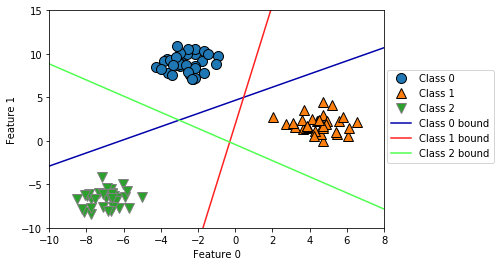

In [43]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 bound', 'Class 1 bound', 'Class 2 bound'], loc=(1.01, 0.3))

위와 같은 분류기 형태에서 중간에 위치한 삼각형에 포함된 점은 어떻게 분류될까?

Text(0, 0.5, 'Feature 1')

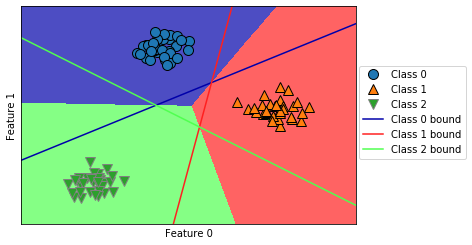

In [44]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 0 bound', 'Class 1 bound',
            'Class 2 bound'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C다. alpha값이 클수록, C값이 작을수록 모델이 단순해진다.

일반적으로 C와 alpha는 로그 스케일로 최적치를 정한다. 그리고 L1 규제를 사용할지 L2 규제를 사용할지를 정한다. 중요한 특성이 많지 않다고 생각한다면 L1, 그렇지 않다면 L2를 사용한다.

선형 모델의 가장 큰 장점은 비교적 쉽게 이해할 수 있다는 점이다(그러나 모든 것을 이해할 순 없다). 반면 특서들이 서로 깊게 연관되어 있을 때 계수를 분석하기가 매우 어렵다.

### 나이브 베이즈 분류기

나이브 베이즈 분류기(이하 NB)는 LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 뒤쳐진다.

나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문이다. 

scikit-learn에서 제공하는 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 세 가지다.

* GaussianNB는 연속적인 데이터에 적용할 수 있음
    * 클래스별로 각 특성의 표준편차와 평균을 저장
    * 고차원인 데이터셋에 사용함
    
* BernoulliNB는 이진 데이터에 적용할 수 있음
    * 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈
    * 텍스트 분류에 사용
    * Alpah 매개벼누를 사용해서 모델의 복잡도를 조절
    
* MultinomialNB은 카운트 데이터에 적용됨
    * 클래스별 특성의 평균을 계산
    * 텍스트 분류에 사용
    * Alpah 매개벼누를 사용해서 모델의 복잡도를 조절
    
BernoulliNB와 MultinomialNB은 대부분 텍스트 데이터를 분류할 때 사용한다.



### 결정 트리

결정 트리는 분류와 회귀 문제에 널리 사용되는 모델이다. 기본적으로 결정 트리는 결정을 위해서 예/아니오 질문을 이어 나가면서 학습한다.

결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻이다. 트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고른다. 타기값이 하나인 노드(순수 노드)가 만들어질 때 까지 계속해서 질문(테스트)를 진행한다.

결정 트리는 순수 노드가 될 떄까지 진행하면 모델이 매우 복잡하기 때문에 훈련 데이터에 과대적합된다. 과대적합을 막는 방법은 크게 두 가지로 일찍 중단하는 방법(사전 가지치기, scikit-learn에서 지원)와 병합 및 삭제(사후 가지치기)하는 것이다.

In [45]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Train score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Train score: 1.000
Test score: 0.937


트리의 깊이를 조절하지 않으면 과대적합 되기 때문에 트리의 깊이를 조절하면 아래와 같은 결과를 확인할 수 있다.

In [46]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Train score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Train score: 0.988
Test score: 0.951


graphviz를 사용하여 결정 트리를 시각화 할 수 있다.

In [47]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

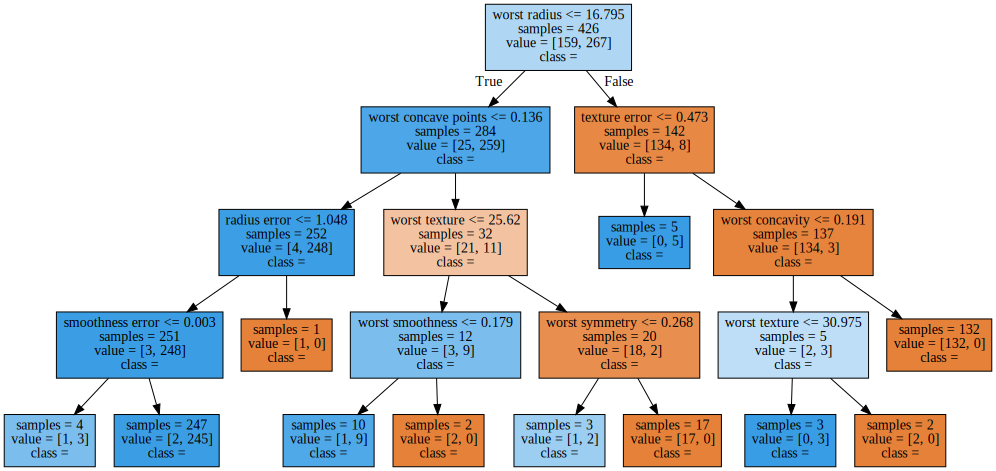

In [48]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

트리가 어떻게 동작하는지 요약하는 속성들을 사용할 수 있다. 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도이다.

In [49]:
print("feature importances:\n", tree.feature_importances_)

feature importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


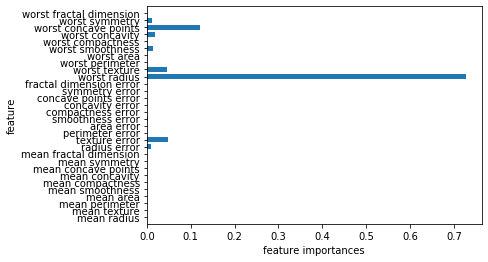

In [50]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

회귀를 위한 트리 기반의 모델을 사용할 때 주의해야 할 점은 결정 트리 기반의 회귀 모델은 외삽 즉, 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다는 점이다.

Text(0, 0.5, 'Price ($/Mbyte)')

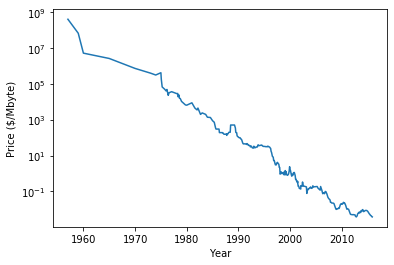

In [51]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

아래 코드를 통해 트리 모델은 선형 모델을 거의 완벽하게 예측하는데 비해서, 2000년 이후 데이터는 예측을 하지 못하는 단점을 보여준다.

In [52]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

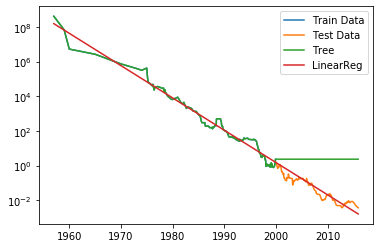

In [53]:
plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree")
plt.semilogy(ram_prices.date, price_lr, label="LinearReg")
plt.legend()

결정 트리는 모델을 쉽게 시각화 할 수 있으며, 데이터 스케일에 구애받지 않는다. 사전 가지치기를 사용함에도 불구하고 과대접합되는 경향이 있다. 이런 단점은 앙상블 방법을 통해서 해결할 수 있다.

### 결정 트리의 앙상블

앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다. 머신러닝에는 이런 종류의 모델이 많지만, 그 중 두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터 셋에서 효과적이라고 입증되었다. 랜덤 포레스트와 그래디언트 부스팅 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용한다.

#### 랜덤 포레스트

랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다. 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초한다. 예컨대 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다(수학적으로 증명되었음).

랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 된다. 트리를 만들기 위해 데이터의 부트스트랩 샘플을 생성한다. 그 다음 데이터셋으로 결정 트리를 만든다.

이 방식에서 핵심 매개변수는 max_features이다. max_features 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰진다. 랜덤 포레스트로 예측을 할 때는 먼저 알고리즘의 모델에 있는 모든 트리의 예측을 만든다.

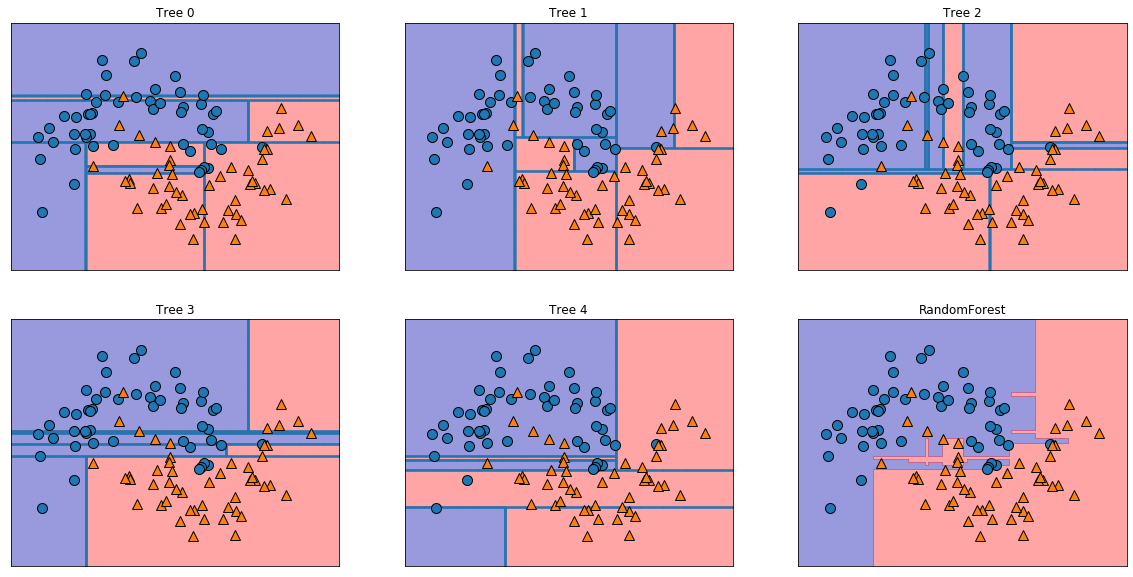

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("RandomForest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

다섯개의 결정 트리의 경계가 확연하게 다르다는 것을 확인할 수 있다. 더 많은 트리를 사용할 수록 부드러운 결정 경계를 표현할 수 있다.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Train: {:.3f}".format(forest.score(X_train, y_train)))
print("Test: {:.3f}".format(forest.score(X_test, y_test)))

Train: 1.000
Test: 0.972


유방암 데이터에 랜덤 포레스트를 적용하면, 별다른 설정이 없어도 결정 트리에 비해서 높은 97%의 정확도를 보여준다

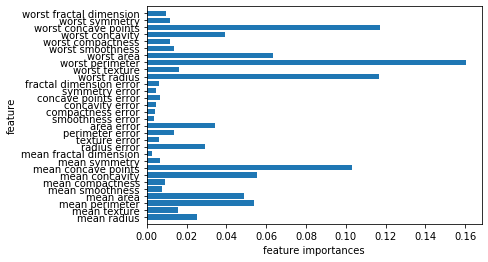

In [56]:
plot_feature_importances_cancer(forest)

또한 결정 트리에 비해서 많은 특성이 0 이상의 중요도 값을 가지는 것도 확인할 수 있다.

* 장점과 단점

회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘 이다. 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없다. 

랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형 모델이 더 적합하다. 랜덤 포레스트는 매우 큰 데이터셋에도 잘 작동하며 훈련은 여러 CPU 코어로 간단하게 병렬화할 수 있다.

면, 텍스트 데이터 같이 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터는 선형 모델이 유리하다.

### 그래디언트 부스팅 회귀 트리

그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법으로, 이름은 회귀지만 회귀와 분류에 모두 사용할 수 있다. 랜덤포레스트와 달리 그래디언트 부스팅은 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없는 대신에 대신 강력한 사전 가지치기가 사용된다.

그래디언트 부스팅 트리는 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다. 그래디언트 부스팅의 근본 아이디어는 얕은 트리 같은 간단한 모델(약한 학습기weak learner)를 많이 연결하는 것이다. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아진다.

그래디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지했고 업계에서도 널리 사용한다. 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공해준다.




In [57]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


훈련 세트 정확도가 100%, 과대적합 되었으니 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮춰보자.

In [58]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [59]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


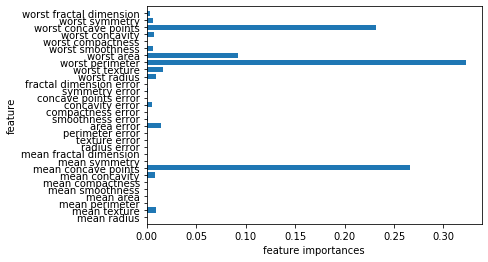

In [60]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여했지만, 트리를 100개나 사용했으므로 깊이가 1이더라도 모든 트리를 분석하기는 쉽지 않다.

그래디언트 부스팅은 랜덤 포레스트와 비슷한 특성을 강조하고 있지만, 부스팅은 일부 특성을 완전히 무시하고 있다.

비슷한 종류의 데이터에서 그래디언트 부스팅과 랜덤 포레스트 둘 다 잘동하지만, 보통 더 안정적인 랜덤 포레스트를 먼저 적용하곤 한다. 랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그래디언트 부스팅을 사용하면 도움이 된다.

* 장점과 단점

매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 단점이 있지만, 이진 특성이나 연속적인 특성에서도 잘 동작하는 장점이 있다.

Text(0, 0.5, 'Feat 1')

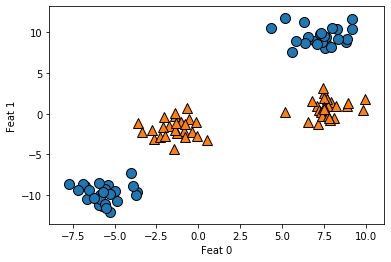

In [62]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feat 0")
plt.ylabel("Feat 1")

분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않는다.

Text(0, 0.5, 'Feat 1')

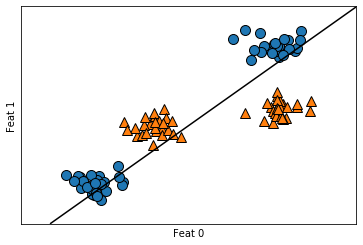

In [64]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feat 0")
plt.ylabel("Feat 1")

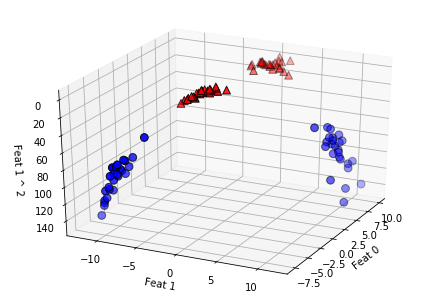

In [66]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feat 0")
ax.set_ylabel("Feat 1")
ax.set_zlabel("Feat 1 ^ 2")
plt.show()

선형적인 특성을 추가해보자.

Text(0.5, 0, 'Feat 1 ^ 2')

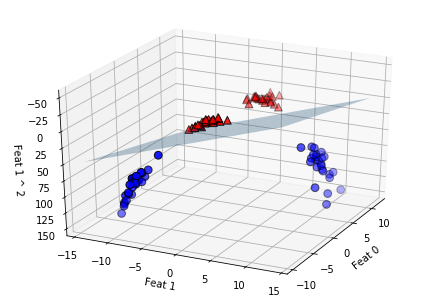

In [67]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feat 0")
ax.set_ylabel("Feat 1")
ax.set_zlabel("Feat 1 ^ 2")


Text(0, 0.5, 'Feat 1')

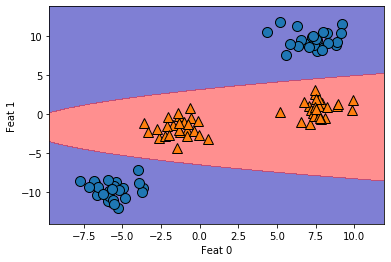

In [68]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feat 0")
plt.ylabel("Feat 1")

선형모델이라고 하지만 선형 모델이 아님을 확인할 수 있다.

### 커널 기법

앞에선 간단한 모델이라 특성을 추가했지만, 실제로 어떤 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커진다. 커널 기법을 사용해서 고차원에서 분규기를 학습할 수 있다. 원래 특성을 가능한 조합을 지정된 차수까지 올리는 다항식 커널이 있고, 가수이산 혹은 RBF 커널이라 불리는 커널이 존재한다.

### SVM 이해하기

SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 됩니다. 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 줍니다. 바로 두 클래스 사이의 경계에 위치한 데이터 포인티들입니다. 이런 데이터 포인트를 서포트 벡터라 하며, 여기서 서포트 벡터 머신이라 이름이 유래했다.

Text(0, 0.5, 'Feat 1')

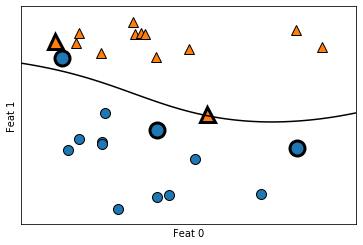

In [70]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feat 0")
plt.ylabel("Feat 1")

### SVM 매개변수 튜닝

gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정합니다. 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적입니다. 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커집니다. C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수입니다.

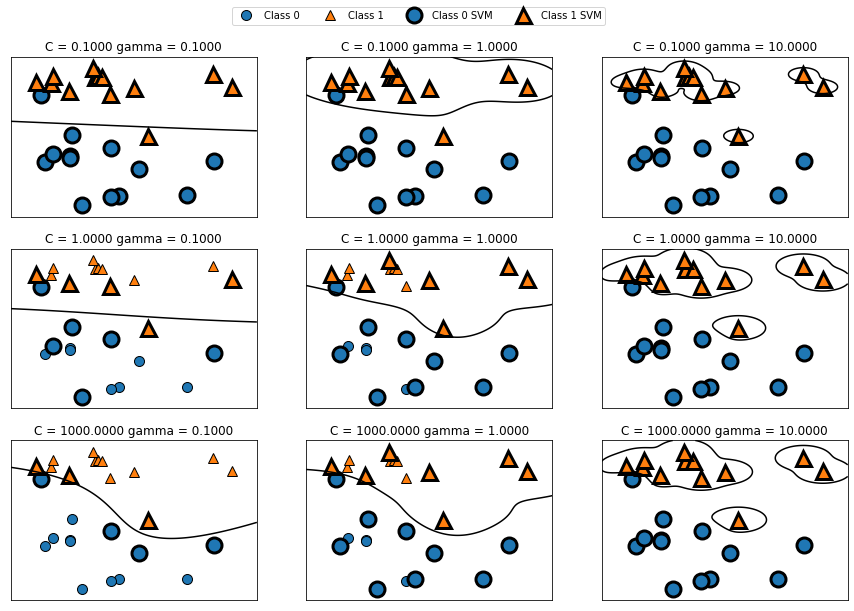

In [72]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["Class 0", "Class 1", "Class 0 SVM", "Class 1 SVM"],
                  ncol=4, loc=(.9, 1.2))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


Text(0, 0.5, 'Feat Size')

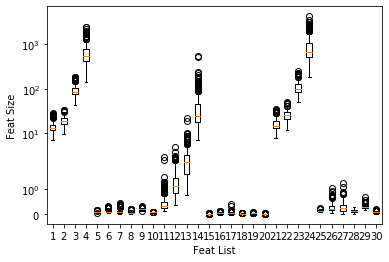

In [78]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feat List")
plt.ylabel("Feat Size")

유방암 관련 데이터셋의 특성은 자릿수 자체가 완전히 다르며, 이것은 일부 모델에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 크다.

### SVM을 위한 데이터 전처리

이 문제를 해결하는 방법 중 하나는 특성 값의 범위가 비슷해지도록 조정하는 것으로 커널 SVM에서는 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나, 0과 1사이로 맞추는 방법을 많이 사용한다.

In [79]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [80]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [81]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


In [82]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


* 장점과 단점

저차원과 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않는다. 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제이다.

SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점이다. 또한 SVM 모델은 분석하기도 어렵다. 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해합니다.

하지만 모든 특성이 비슷한 단위이고 스케일이 비슷하면 SVM을 시도해볼 만합니다.

## 딥러닝(다층 퍼셉트론)

In [95]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.760


In [96]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.973
테스트 세트 정확도: 0.880


In [100]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.760


In [98]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

(array([0.13275391, 0.15804744]), array([0.0176236 , 0.02497899]))

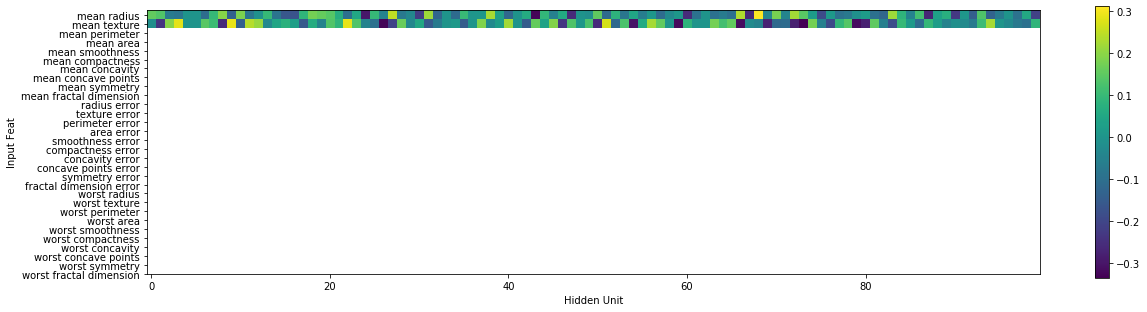

In [99]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Hidden Unit")
plt.ylabel("Input Feat")
plt.colorbar()

### 분류 예측의 불확실성 추정

#### 테스트 데이터

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### 결정함수

In [102]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [108]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test))

결정 함수:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


In [109]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [105]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

pred 는 예측 결과와 같다: True


In [106]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


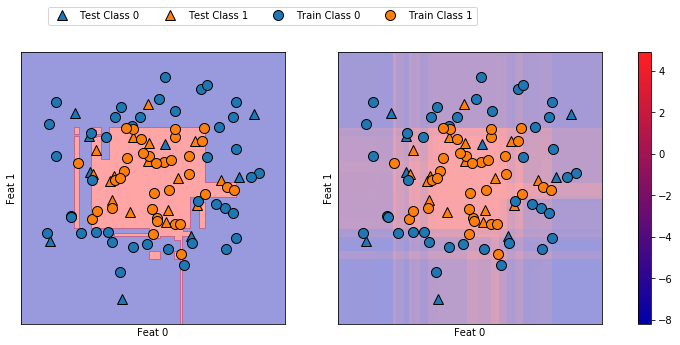

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feat 0")
    ax.set_ylabel("Feat 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test Class 0", "Test Class 1", "Train Class 0",
                "Train Class 1"], ncol=4, loc=(.1, 1.1))

#### 예측 확률

In [111]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [113]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


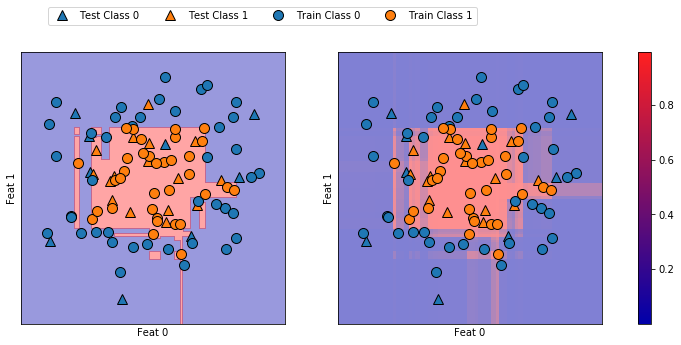

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feat 0")
    ax.set_ylabel("Feat 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test Class 0", "Test Class 1", "Train Class 0",
                "Train Class 1"], ncol=4, loc=(.1, 1.1))

#### 다중 분류

In [115]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [116]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [117]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [118]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
합: [1. 1. 1. 1. 1. 1.]


In [119]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


사이킷런 0.20 버전에서 `LogisticRegression`의 `multi_class` 매개변수 옵션에 `auto`가 추가되었습니다. `auto`로 설정하면 이진 분류이거나 `solver`가 `liblinear`일 경우에는 `ovr`을 선택하고 그 외에는 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 변경됩니다.

In [120]:
logreg = LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
